In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("mpg.csv")

In [3]:
data = data[data.horsepower != "?"]

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [5]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.model_selection import train_test_split
df=data
training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
target = 'mpg'

X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.10, random_state=169)

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, criterion='mse',max_depth=5,min_samples_split=4,
min_samples_leaf=3)

#n_estimators mean n forests

In [9]:
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200)

In [10]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 1.88
R Square score: 0.96


[Text(162.75, 199.32, 'X[2] <= 153.0\nmse = 69.094\nsamples = 225\nvalue = 24.57'),
 Text(68.82000000000001, 163.07999999999998, 'X[3] <= 76.5\nmse = 37.381\nsamples = 119\nvalue = 30.189'),
 Text(37.2, 126.83999999999999, 'X[4] <= 70.5\nmse = 13.947\nsamples = 49\nvalue = 25.45'),
 Text(22.32, 90.6, 'X[1] <= 2.5\nmse = 7.773\nsamples = 13\nvalue = 29.31'),
 Text(14.88, 54.359999999999985, 'X[2] <= 90.5\nmse = 3.473\nsamples = 9\nvalue = 27.9'),
 Text(7.44, 18.119999999999976, 'mse = 0.444\nsamples = 5\nvalue = 29.333'),
 Text(22.32, 18.119999999999976, 'mse = 0.312\nsamples = 4\nvalue = 25.75'),
 Text(29.76, 54.359999999999985, 'mse = 1.139\nsamples = 4\nvalue = 32.833'),
 Text(52.080000000000005, 90.6, 'X[4] <= 96.5\nmse = 8.956\nsamples = 36\nvalue = 24.076'),
 Text(44.64, 54.359999999999985, 'X[0] <= 18.1\nmse = 5.641\nsamples = 31\nvalue = 24.883'),
 Text(37.2, 18.119999999999976, 'mse = 2.927\nsamples = 27\nvalue = 25.562'),
 Text(52.080000000000005, 18.119999999999976, 'mse = 3.

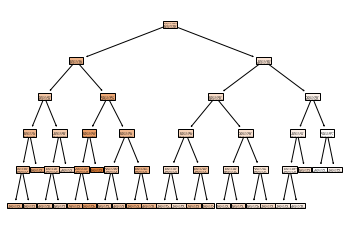

In [11]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0],filled=True)

#reduce depth to get a clear picture with values
# model.estimators_[i] here i can be 0 to 199 since number of trees are 200